In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
%matplotlib inline

In [2]:
rawdf=pd.read_pickle('bigtrainingdataset.pickle')
df=rawdf.drop(['key','myteam','oppteam','gamedate'],axis=1)

In [3]:
def GetAdjustedDF(df,adj_factor):
    
    def AdjustedStats (statlist,adj_factor) :
        if len(statlist)==3:
            return np.matmul(np.array(statlist),np.array([1+adj_factor,1,1-adj_factor]))
        elif len(statlist)==4:
            return np.matmul(np.array(statlist),np.array([1+adj_factor,1+adj_factor/2,1-adj_factor/2,1-adj_factor]))
    
    cols_to_transform=['myteam_prvwins', 'oppteam_prvwins','myteam_scores', 'oppteam_scores', 'myteam_trnovr', 'oppteam_trnovr',
       'myteam_top', 'oppteam_top', 'myteam_pyds', 'oppteam_pyds',
       'myteam_ryds', 'oppteam_ryds', 'myteam_penyds', 'oppteam_penyds',
       'myteam_ptyds', 'oppteam_ptyds']

    adjusteddf=df.copy()
    for col in cols_to_transform:
        adjusteddf[col]=df[col].apply(AdjustedStats,adj_factor=adj_factor)
        
    return adjusteddf

In [5]:
df=GetAdjustedDF(df,adj_factor=1)

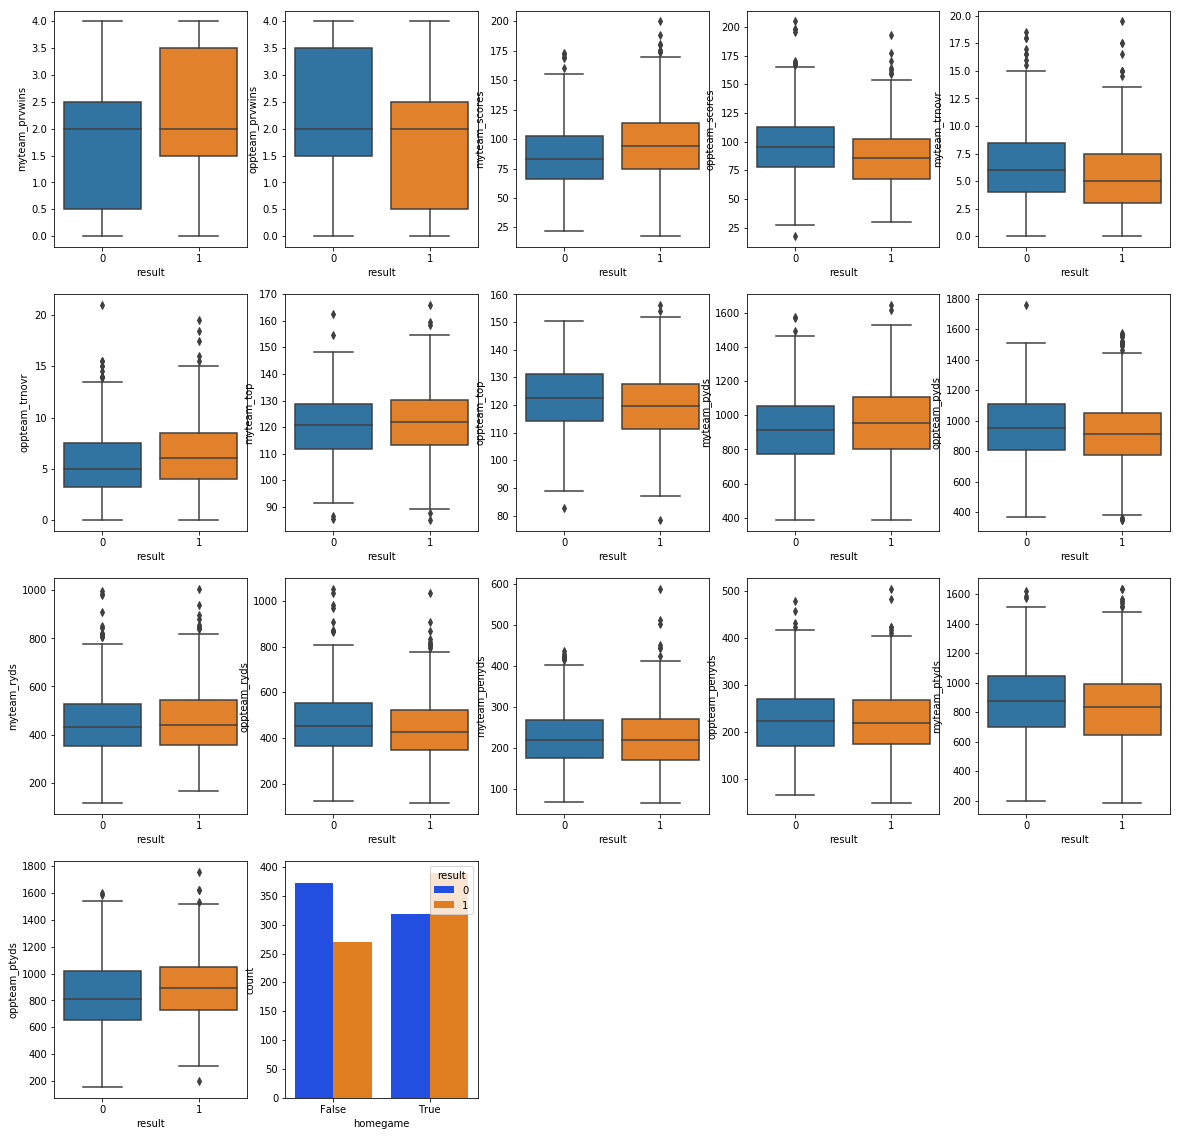

In [6]:
# 'myteam_prvwins', 'oppteam_prvwins', 'homegame', 'result',
#        'myteam_scores', 'oppteam_scores', 'myteam_trnovr', 'oppteam_trnovr',
#        'myteam_top', 'oppteam_top', 'myteam_pyds', 'oppteam_pyds',
#        'myteam_ryds', 'oppteam_ryds', 'myteam_penyds', 'oppteam_penyds',
#        'myteam_ptyds', 'oppteam_ptyds'

plt.figure(figsize=[20,20])
plt.subplot(451)
sns.boxplot(data=df,x='result',y='myteam_prvwins')
plt.subplot(452)
sns.boxplot(data=df,x='result',y='oppteam_prvwins')
plt.subplot(453)
sns.boxplot(data=df,x='result',y='myteam_scores')
plt.subplot(454)
sns.boxplot(data=df,x='result',y='oppteam_scores')
plt.subplot(455)
sns.boxplot(data=df,x='result',y='myteam_trnovr')
plt.subplot(456)
sns.boxplot(data=df,x='result',y='oppteam_trnovr')
plt.subplot(457)
sns.boxplot(data=df,x='result',y='myteam_top')
plt.subplot(458)
sns.boxplot(data=df,x='result',y='oppteam_top')
plt.subplot(459)
sns.boxplot(data=df,x='result',y='myteam_pyds')
plt.subplot(4,5,10)
sns.boxplot(data=df,x='result',y='oppteam_pyds')
plt.subplot(4,5,11)
sns.boxplot(data=df,x='result',y='myteam_ryds')
plt.subplot(4,5,12)
sns.boxplot(data=df,x='result',y='oppteam_ryds')
plt.subplot(4,5,13)
sns.boxplot(data=df,x='result',y='myteam_penyds')
plt.subplot(4,5,14)
sns.boxplot(data=df,x='result',y='oppteam_penyds')
plt.subplot(4,5,15)
sns.boxplot(data=df,x='result',y='myteam_ptyds')
plt.subplot(4,5,16)
sns.boxplot(data=df,x='result',y='oppteam_ptyds')
plt.subplot(4,5,17)
sns.countplot(x="homegame", hue="result", data=df,palette="bright")


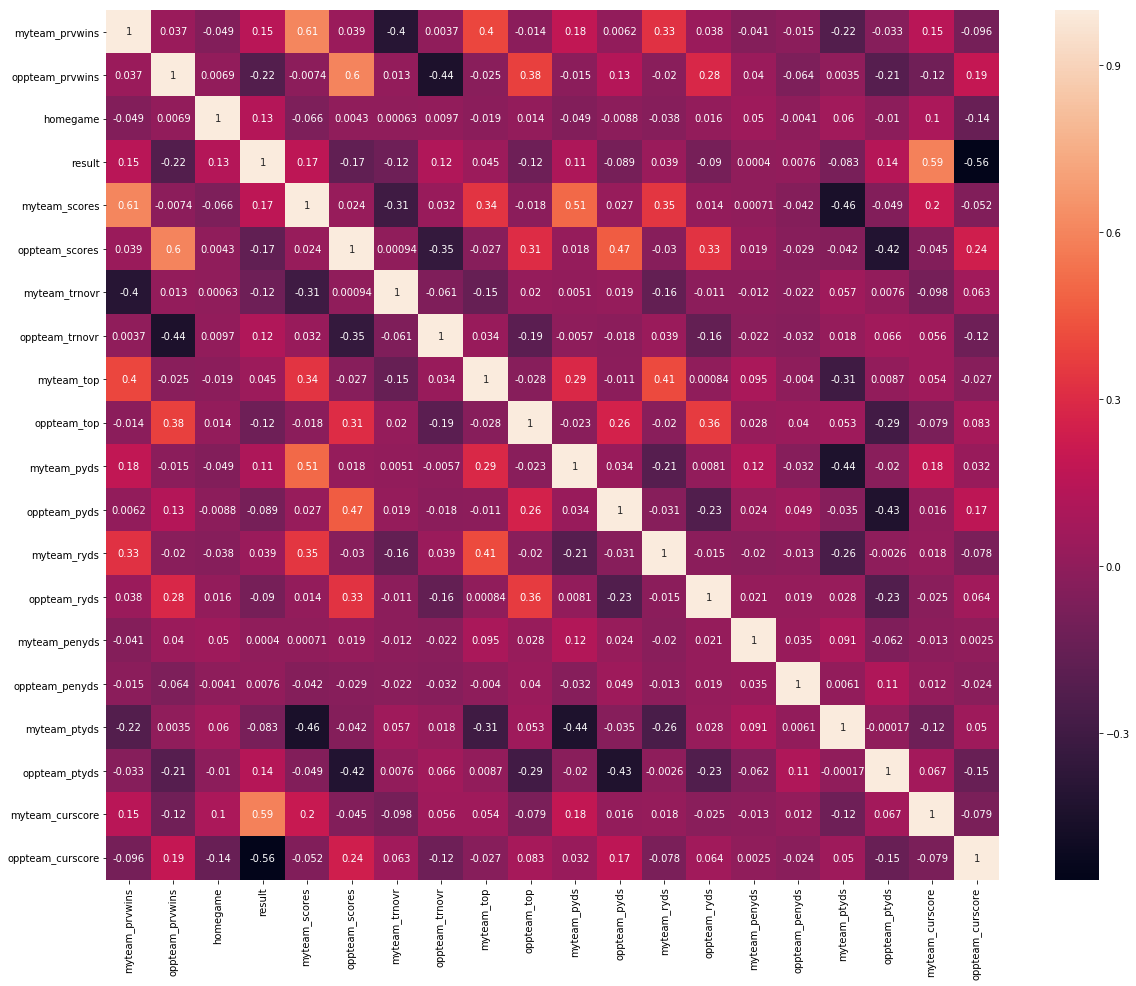

In [7]:
plt.figure(figsize=[20,16])
sns.heatmap(df.corr(),annot=True)

Clear Correlation above between MyTeamScores and MyteamPreviousWins and between MyteamScores and MyteamPassyards
Also, More punt yards results in lower scores, My team Punt Yards is Inversely Correlated with Myteam scores,MyteamPasyards

Penalty Yards can probably be dropped..Very little correlation with result as well as other variables
We will also drop either My team Scores and My team Previous Wins(Mostly my team previous wins)